<a href="https://colab.research.google.com/github/ChetanJadhav2341/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month

# **Import Librorys**





In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Project-Regression/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

# **Data Description**

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [18]:
df.sample(10)

,Date,Open,High,Low,Close
44,2009-03-01,10.00,11.24,8.16,9.98
138,2017-01-01,231.98,284.31,226.30,279.10
41,2008-12-01,12.40,16.56,11.13,15.03
129,2016-04-01,172.02,190.44,165.33,188.73
8,2006-03-01,16.20,20.95,16.02,20.08
135,2016-10-01,253.41,265.50,245.80,253.52
86,2012-09-01,66.20,77.69,64.46,76.44
154,2018-05-01,362.85,364.40,325.70,346.20
26,2007-09-01,37.40,41.75,35.30,41.36
149,2017-12-01,307.20,319.00,300.65,315.05


In [10]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB



**Dataset we have 185 rows and 5 column. Here our dependent variable is Close and**
**Independent variable is Open, High and Low.**


> **Date :-** It denotes the month and year of the for a particular price.


> **Open :-** Open means the price at which a stock started trading that month.


> **High :-** refers to the maximum price that month.


> **Low :-** refers to the minimum price that month.


> **Close :-** refers to the final trading price for that month, which we have to predict using regression



# **Data Cleaning**

In [13]:
#Looking for missing values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset.Here our dataset in no nan values

In [14]:
#Looking for duplicates in dataset
len(df[df.duplicated()])

0


No duplicate values in dataset.

**Data Type Change :-**



> The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MMDD. Since, Date column has dtype as object we've to convert it into datetime format.

In [15]:
# required the changing data type of date 
# Here converted the data type of integer into Datetime using the string parse time 
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [17]:
#check dtype of date now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


# **Checking Outliers**

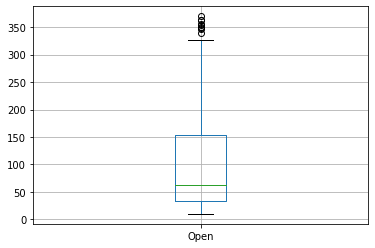

In [19]:
df.boxplot('Open')

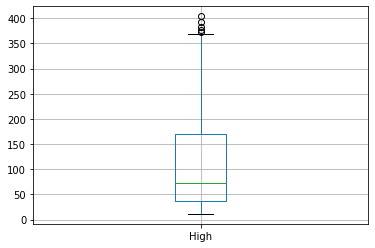

In [20]:
df.boxplot('High')

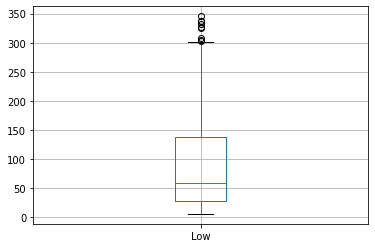

In [21]:
df.boxplot('Low')

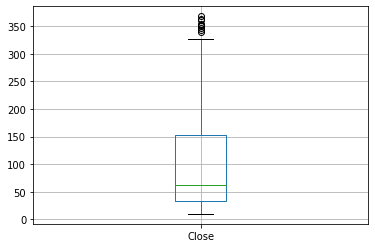

In [22]:
df.boxplot('Close')

Data preprocessing finished. Dataset is clean and ready for exploratory data analysis